In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("android-games.csv")

In [3]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [4]:
# Show the contents of category column
df["category"].value_counts()

category
GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: count, dtype: int64

In [5]:
# Show information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


### Represent the categories in the category column in a word cloud visual

In [6]:
# Take a copy of data frame
dfc = df.copy()

In [7]:
# Create a new variable which contains all types of categories without the word game
type_cat = dfc['category'].str.replace("GAME ", "")

In [8]:
type_cat.head()

0    ACTION
1    ACTION
2    ACTION
3    ACTION
4    ACTION
Name: category, dtype: object

In [9]:
# Add all vaues inside the type_cat variable to a new variable as a string variable
# Which means create a text doc
text = ' '.join(i for i in type_cat)

In [10]:
# Show the new text
text

'ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ACTION ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE ADVENTURE

### Now is the time to visualize the above text

In [11]:
# First I want to see the count for each word in the text
type_cat.value_counts()

category
CARD            126
WORD            104
PUZZLE          100
TRIVIA          100
STRATEGY        100
SPORTS          100
SIMULATION      100
ROLE PLAYING    100
RACING          100
ACTION          100
ADVENTURE       100
EDUCATIONAL     100
CASUAL          100
CASINO          100
BOARD           100
ARCADE          100
MUSIC           100
Name: count, dtype: int64

In [12]:
# list of words
names = type_cat.value_counts().index.to_list()

In [13]:
# list of values of all words
values = type_cat.value_counts().values

In [14]:
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)

Text(0, 0.5, 'Count')

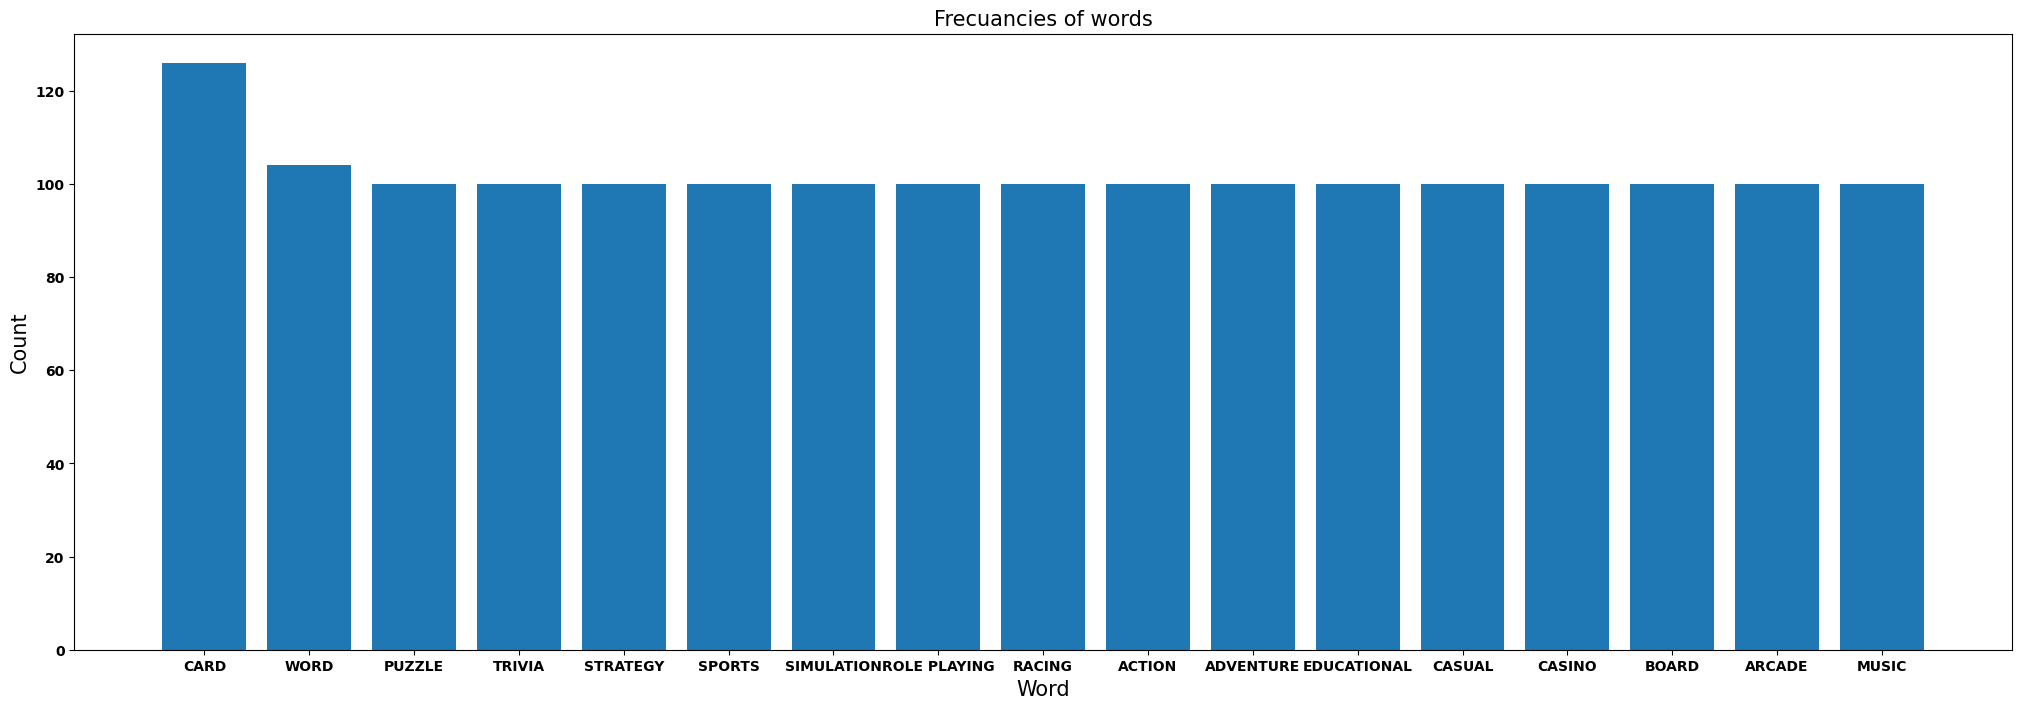

In [18]:
# Now I want to viuslaize each word in a bar chart to see which one is the most redundent
plt.figure(figsize=(25, 8))
plt.bar(names, values)
plt.title("Frecuancies of words", fontsize=15)
plt.xlabel("Word", fontsize=15)
plt.ylabel("Count", fontsize=15)

In [23]:
# Checking Nan values, because the word cloud does not handle the nan values
if type_cat.isna().sum().sum() == 0:
    print("There are no Nan values...")
else:
    print("There are Nan values...")

There are no Nan values...


In [27]:
# Now is the time to create a word cloud visual
# if you want no stopwords at all appear in the cloud, you could use collocations=False like this

# Creating object 
word_cloud = WordCloud(collocations = False, background_color = 'white')

In [28]:
# Generate the word cloud, generate: takes a textual data
word_cloud_gen = word_cloud.generate(text=text)

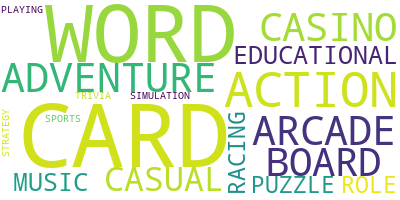

In [29]:
# display it using wordcloud module
word_cloud_gen.to_image()

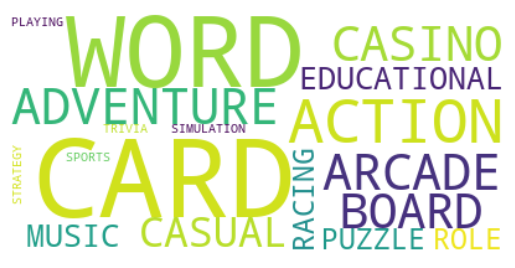

In [30]:
# We can display it using matplotlib
plt.imshow(word_cloud_gen, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
# We can do visualization for the title column
title = dfc[['title']]
title.head(3)

,title
0,Garena Free Fire- World Series
1,PUBG MOBILE - Traverse
2,Mobile Legends: Bang Bang


In [47]:
# Creating a variable contains the textual data of 'title column'
textualTitle = " ".join(tit[0] for tit in title.values)

In [48]:
textualTitle

"Garena Free Fire- World Series PUBG MOBILE - Traverse Mobile Legends: Bang Bang Brawl Stars Sniper 3D: Fun Free Online FPS Shooting Game Call of Duty®: Mobile - Season 4: Spurned & Burned Among Us Temple Run 2 PUBG MOBILE LITE Gangstar Vegas: World of Crime Pixel Gun 3D: FPS Shooter & Battle Royale Bowmasters Standoff 2 Talking Tom Gold Run Garena Liên Quân Mobile Banana Kong Crossy Road War Robots. 6v6 Tactical Multiplayer Battles MORTAL KOMBAT: The Ultimate Fighting Game! Last Day on Earth: Survival Agar.io DEER HUNTER CLASSIC Modern Combat 5: eSports FPS Kick the Buddy Special Forces Group 2 DEAD TRIGGER 2 - Zombie Game FPS shooter Mini Militia - Doodle Army 2 Call of Duty®: Mobile - Garena CATS: Crash Arena Turbo Stars Injustice: Gods Among Us Swamp Attack GUNSHIP BATTLE: Helicopter 3D Real Steel World Robot Boxing Critical Ops: Online Multiplayer FPS Shooting Game LINE Rangers - a tower defense RPG w/Brown & Cony! Worms Zone .io - Voracious Snake Six-Guns: Gang Showdown DEAD TARG

In [50]:
title_word_cloud = word_cloud.generate(textualTitle)

In [56]:
# To save the image
# title_word_cloud.to_file("title_word_cloud.png")

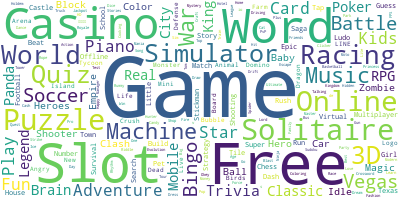

In [57]:
# Showing the last generated image
title_word_cloud.to_image()

In [90]:
word_cloud.max_words = 2000
word_cloud.background_color = 'black'
word_cloud.width=600
word_cloud.height=500


In [91]:
new_title_word_cloud = word_cloud.generate(textualTitle)

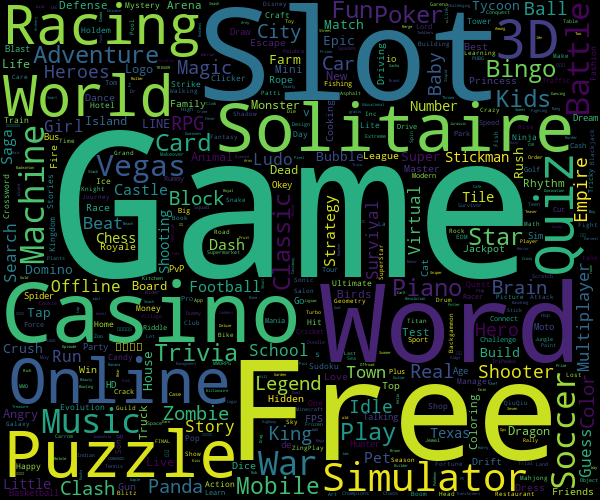

In [92]:
new_title_word_cloud.to_image()

## Building function for creating a word cloud 

In [152]:
def cloud_visualizer(
    text: str = None,
    background_color: str = "black",
    width: int = 500,
    height: int = 300,
    show: bool = False,
    saveimg: str = None,
    array: bool = False,
    specific_path: str = None
    ):
    """
    word cloud visualizer 
    -------------------------------------------------------------------------------
    text: the textual data used for visualizing the wordsm the type value is "str" by default equal to "None".
    
    background_color: to change the background color, by default equal to "black".
    
    width: to change the width of image the type value is "int" by default equal to "500".
    
    height: to change the width of image the type value is "int" by default equal to "300".  
    
    show: for sowing the image.
    
    saveimg: name of the file if None so the new image will not save.
    
    array: return the new image as an array.
    """
    
    # Initialize the WordCloud object
    wordCloud = WordCloud(collocations=False, background_color=background_color,
                         width=width, height=height)
    
    # Generate the image 
    gen = wordCloud.generate(text)
    
    if show:
        return gen.to_image()
    
    elif specific_path is not None and saveimg is not None:
        gen.to_file(specific_path + '\\' + saveimg + ".png")
        print(f'image saved in {specific_path}\\{saveimg + ".png"}...')
    
    elif saveimg is not None:
        gen.to_file(saveimg + ".png")
        print("New image is saved...")
        
    elif array:
        return gen.to_array()
    

In [118]:
print(cloud_visualizer.__doc__)


    word cloud visualizer 
    -------------------------------------------------------------------------------
    text: the textual data used for visualizing the wordsm the type value is "str" by default equal to "None".
    
    background_color: to change the background color, by default equal to "black".
    
    width: to change the width of image the type value is "int" by default equal to "500".
    
    height: to change the width of image the type value is "int" by default equal to "300".  
    
    show: for sowing the image.
    
    saveimg: name of the file if None so the new image will not save.
    
    array: return the new image as an array.
    


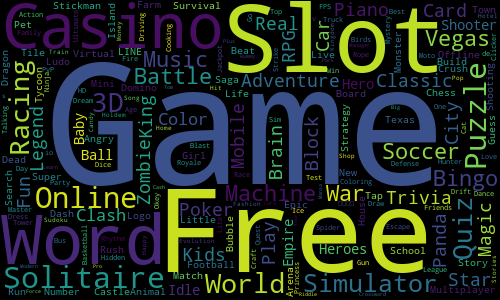

In [116]:
cloud_visualizer(text=textualTitle, show=True)

In [125]:
cloud_visualizer(text=textualTitle, show=False, saveimg="words")

New image is saved...


In [126]:
cloud_visualizer(text=textualTitle, array=True)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [156]:
cloud_visualizer(text=textualTitle, specific_path="E:\pycharmProjects\website_visualizer\outputs",
                 saveimg="cloud")

image saved in E:\pycharmProjects\website_visualizer\outputs\cloud.png...


In [155]:
cloud_visualizer(text=textualTitle, 
                 saveimg="cloud")

New image is saved...
